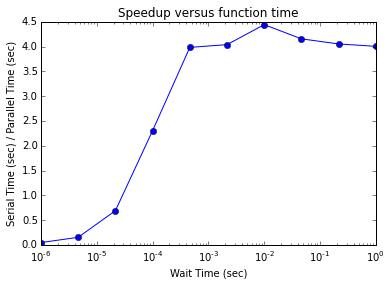

In [11]:
%matplotlib inline
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
import numpy as np
from pylab import savefig

# Sleep for t seconds
def burnTime(t):
    time.sleep(t)

# Main
if __name__ == '__main__':
    N = 16  # The number of jobs
    P = 4   # The number of processes

    # A thread pool of P processes
    pool = mp.Pool(P)

    # Use a variety of wait times
    ratio = []
    wait_time = np.logspace(-6.0, 0, num=10)

    for t in wait_time:
        # Compute jobs serially and in parallel
        # Use time.time() to compute the elapsed time for each
        
        # Compute jobs in parralel
        time_start = time.time()

        pool.map(burnTime,t*np.ones((N,1)))

        time_end = time.time()

        parallelTime = time_end - time_start
        
        # Compute jobs in series
        
        time_start = time.time()

        for n in range(0,N):
            burnTime(t)

        time_end = time.time()
        
        serialTime = time_end - time_start
        
        # Compute the ratio of these times
        ratio.append(serialTime/parallelTime)

    # Plot the results
    plt.close()
    plt.figure()
    plt.plot(wait_time, ratio, '-ob')
    plt.xscale('log')
    plt.xlabel('Wait Time (sec)')
    plt.ylabel('Serial Time (sec) / Parallel Time (sec)')
    plt.title('Speedup versus function time')
    savefig('P6.png')
